# Customer Segmentation
- K Mean Clustering
  - unsupervised learning hai no x and y only data and cluset
  - DATA TO CLUSTER Mapping
  - optimum number of clusters
  - k-means clustering model
- Visualize the clusters

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# /content/Mall_Customers.csv
import seaborn as sns
from sklearn.cluster import KMeans

## Data Collection and processing

In [3]:
customer_df= pd.read_csv("/content/Mall_Customers.csv")

In [6]:
customer_df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
customer_df.shape

(200, 5)

## Null Values and Handling it

In [7]:
customer_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
customer_df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


## Creating X and Y
- choosing annual income and spending score column

In [21]:
x= customer_df.iloc[:,[3,4]].values

In [22]:
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

## Chossing the number of clusters
- WCSS uses centroid point and other point distance
  - for different number of cluster number calculate wcss
  - take the smallest wcss value as that tells best fit for all point near to centroid
- Choose k (number of clusters)
  - KMeans(n_clusters=2, random_state=0)
  - You decide this or use techniques like the elbow method (with WCSS).
  - wcss.append(kmeans.inertia_) // KMEANS Model mein values hai wcss hai
- Initialize k centroids randomly
  - Each centroid is a point in the same space as your data — for 2D xy, it's a [x, y] poin
- Assign each point to the nearest centroid
  - Use a distance metric (usually Euclidean) to calculate distance from each point to each centroid, and assign the point to the closest centroid
- Recompute the centroids
  - After points are assigned to clusters, update the centroid of each cluster by computing the mean of all points in that cluster.

In [23]:
## Deciding cluster number basis of wcss
wcss = []
for i in range (1,11):
  kmeans= KMeans(n_clusters=i, init='k-means++', random_state=42)
  # randomly select data
  # init parameter – what it does:
  # It controls how the initial cluster centroids are chosen before the iterations begin.
  # k-means++: Update centroid after randomly first wala select jaise data point add centroid upadte
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

### Elbow Plot WCSS And Iteration

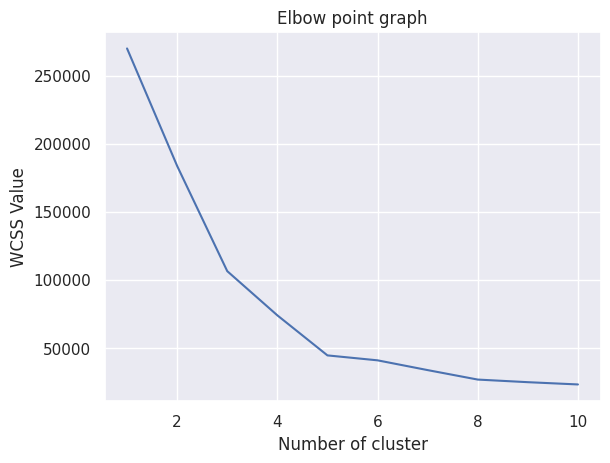

In [24]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title("Elbow point graph")
plt.xlabel("Number of cluster")
plt.ylabel("WCSS Value")
plt.show()

### Optimum number of clusters = 5
- looking at elbow point graph

## Training the model with K=5 number of clusters

In [25]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)

### Cluster mapping
- Data X to which Cluster Y

In [28]:
y= kmeans.fit_predict(x)
print(y)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]
[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]


## Visualize the Clusters X and Y
- Plotting all the clusters and their centroids

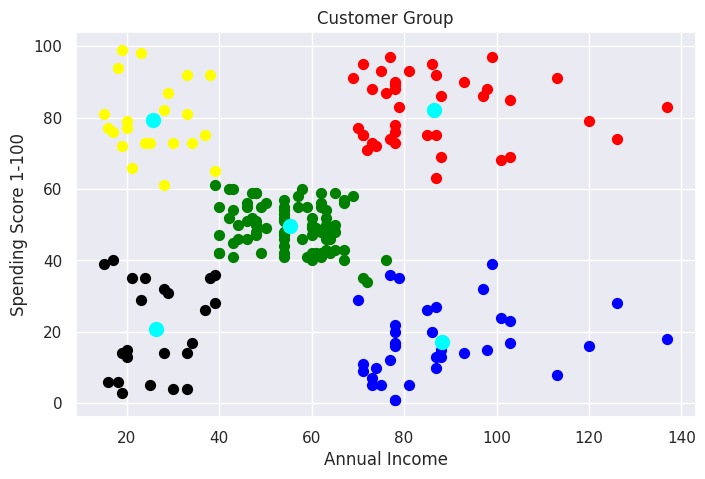

In [31]:
plt.figure(figsize=(8, 5))
# x[y==0,0] where y==0 index and since x is [0,1] value uska 0 value x axis and 1 value y axis
# s= size of dots c = color
plt.scatter(x[y==0,0],x[y==0,1],s=50,c='green',label='Cluster1')
plt.scatter(x[y==1,0],x[y==1,1],s=50,c='red',label='Cluster2')
plt.scatter(x[y==2,0],x[y==2,1],s=50,c='blue',label='Cluster3')
plt.scatter(x[y==3,0],x[y==3,1],s=50,c='black',label='Cluster4')
plt.scatter(x[y==4,0],x[y==4,1],s=50,c='yellow',label='Cluster5')

# scatter with array1 array2 data
# kmeans.cluster_centers_[:,0] array ka first point
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='centroid')
plt.title("Customer Group")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score 1-100")
plt.show()

## Build Predictive System

Predicted cluster: 0


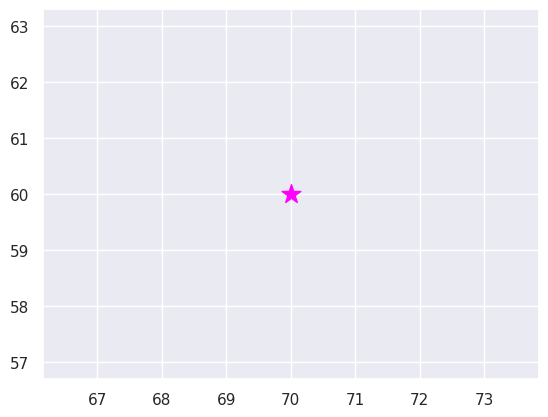

In [30]:
new_point = np.array([[70, 60]])  # example point
predicted_cluster = kmeans.predict(new_point)[0]
print("Predicted cluster:", predicted_cluster)
plt.scatter(new_point[0][0], new_point[0][1],
            s=200, c='magenta', marker='*', label='New Point')

### Combining New and old plot

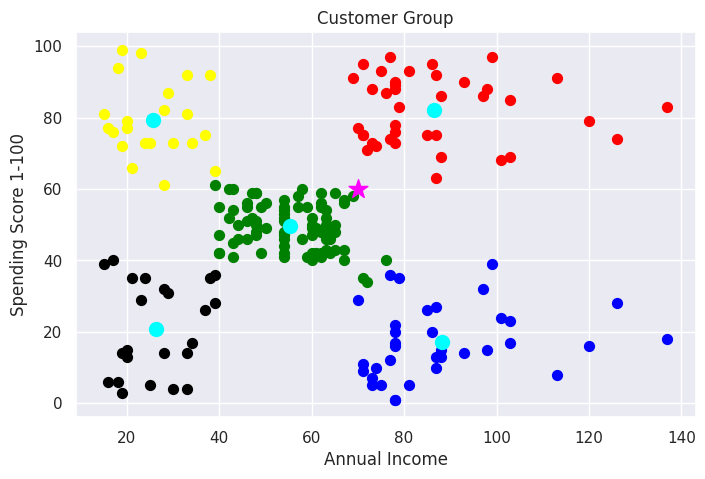

In [32]:
plt.figure(figsize=(8, 5))
# x[y==0,0] where y==0 index and since x is [0,1] value uska 0 value x axis and 1 value y axis
# s= size of dots c = color
plt.scatter(x[y==0,0],x[y==0,1],s=50,c='green',label='Cluster1')
plt.scatter(x[y==1,0],x[y==1,1],s=50,c='red',label='Cluster2')
plt.scatter(x[y==2,0],x[y==2,1],s=50,c='blue',label='Cluster3')
plt.scatter(x[y==3,0],x[y==3,1],s=50,c='black',label='Cluster4')
plt.scatter(x[y==4,0],x[y==4,1],s=50,c='yellow',label='Cluster5')

# scatter with array1 array2 data
# kmeans.cluster_centers_[:,0] array ka first point
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='centroid')

# Predicting new value plot
plt.scatter(new_point[0][0], new_point[0][1],
            s=200, c='magenta', marker='*', label='New Point')

plt.title("Customer Group")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score 1-100")
plt.show()